**AMIGOS FACIAL VIDEOS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **ML Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, log_loss, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

In [ ]:
"""

Load Mega_df from Drive

"""

mega_df = pd.read_csv("/content/drive/MyDrive/Amigos/Mega_DF_2.csv")

In [ ]:
mega_df

In [ ]:
mega_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Columns: 6412 entries, Feature1 to sadness
dtypes: float64(6405), int64(7)
memory usage: 62.6 MB


In [ ]:
mega_df.columns[6400:]

Index(['arousal', 'valence', 'dominance', 'liking', 'familiarity', 'neutral',
       'disgust', 'happiness', 'surprise', 'anger', 'fear', 'sadness'],
      dtype='object')

## **Label: Arousal**

In [ ]:
mega_df['arousal']

,arousal
0,6.488056
1,6.488056
2,4.931744
3,4.931744
4,3.129696
...,...
1275,5.555936
1276,5.000000
1277,5.000000
1278,5.000000


In [ ]:
# set threshold to 4.5. If the value in arousal column is >= threshold set it to 1 else 0

threshold = 4.5
mega_df['arousal'] = mega_df['arousal'].apply(lambda x: '1' if float(x) >= threshold else '0')

In [ ]:
mega_df['arousal']

,arousal
0,1
1,1
2,1
3,1
4,0
...,...
1275,1
1276,1
1277,1
1278,1


In [ ]:
# DataFrame is named mega_df
# shuffled_df = mega_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Assuming your DataFrame is named 'mega_df'
features = mega_df.iloc[:, :6400].values  # Selecting the first 128 columns as features
label = mega_df['arousal'].values  # Selecting the 129th column as the label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=32)

In [ ]:
y_test = np.array([int(Y) for Y in y_test])
y_train = np.array([int(Y) for Y in y_train])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1024, 6400)
(1024,)
(256, 6400)
(256,)


In [ ]:
# Create an SVM classifier
svm_model = SVC(kernel='linear', C=1)  # You can also try 'rbf' or 'poly' kernels
# Train the model
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_SVC = svm_model.predict(X_test)
# Calculate the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracy_svc * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred_SVC))

Accuracy: 69.14%
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        82
           1       0.77      0.77      0.77       174

    accuracy                           0.69       256
   macro avg       0.65      0.65      0.65       256
weighted avg       0.69      0.69      0.69       256



In [ ]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()
# Train the model on the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred_DT = clf.predict(X_test)
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_DT)
class_report = classification_report(y_test, y_pred_DT)
# Print the results
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("Classification Report:")
print(class_report)

Accuracy: 65.62%
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        82
           1       0.75      0.74      0.74       174

    accuracy                           0.66       256
   macro avg       0.61      0.61      0.61       256
weighted avg       0.66      0.66      0.66       256



In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to tune the model
# Train the KNN model on the training data
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
# Print the results
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print("KNN Classification Report:")
print(class_report_knn)

KNN Accuracy: 73.83%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        82
           1       0.82      0.79      0.80       174

    accuracy                           0.74       256
   macro avg       0.70      0.71      0.70       256
weighted avg       0.74      0.74      0.74       256



In [ ]:
# Create and train a Logistic Regression model
lrc_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lrc_model.fit(X_train, y_train)
# Make predictions
y_pred_LRC = lrc_model.predict(X_test)
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_LRC)
print(f"Accuracy: {accuracy_lr * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred_LRC))

Accuracy: 70.31%
              precision    recall  f1-score   support

           0       0.54      0.51      0.53        82
           1       0.78      0.79      0.78       174

    accuracy                           0.70       256
   macro avg       0.66      0.65      0.65       256
weighted avg       0.70      0.70      0.70       256



In [ ]:
# Initialize the Gradient Boosting classifier
gbm = GradientBoostingClassifier()
# Train the GBM model on the training data
gbm.fit(X_train, y_train)
# Make predictions on the test data
y_pred_gbm = gbm.predict(X_test)
# Evaluate the GBM model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
# Print the results
print(f"GBM Accuracy: {accuracy_gbm * 100:.2f}%")
print("GBM Classification Report:")
print(class_report_gbm)

GBM Accuracy: 75.00%
GBM Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.39      0.50        82
           1       0.76      0.92      0.83       174

    accuracy                           0.75       256
   macro avg       0.73      0.65      0.67       256
weighted avg       0.74      0.75      0.73       256



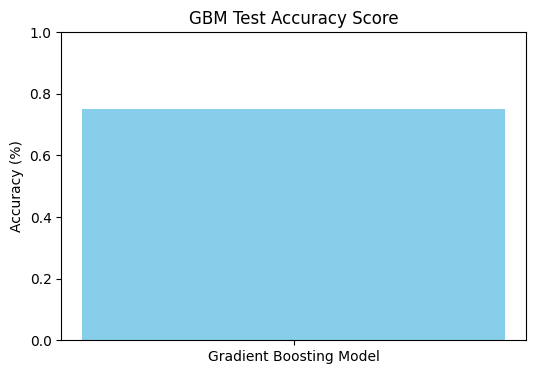

In [ ]:
# Plot the accuracy score
plt.figure(figsize=(6, 4))
plt.bar(['Gradient Boosting Model'], [accuracy_gbm], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Score")
plt.show()

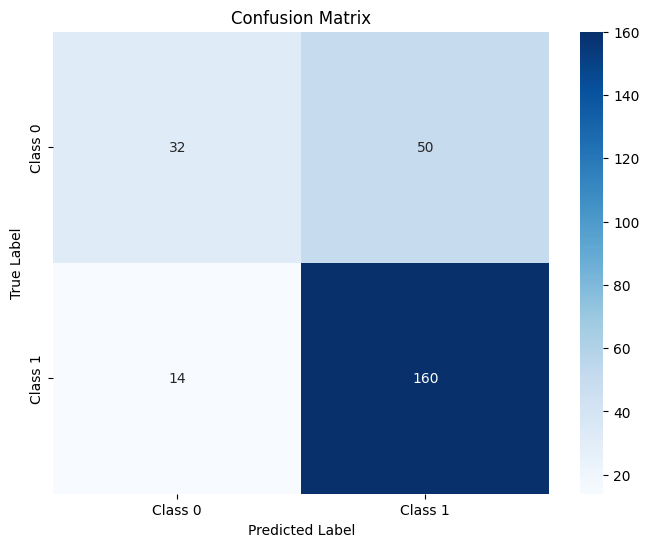

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_gbm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Label: Valence**

In [ ]:
mega_df['valence']

,valence
0,9.000000
1,9.000000
2,6.651880
3,6.651880
4,6.761096
...,...
1275,6.288136
1276,6.667800
1277,6.667800
1278,3.983048


In [ ]:
# set threshold to 4.5. If the value in arousal column is >= threshold set it to 1 else 0

threshold = 4.5
mega_df['valence'] = mega_df['valence'].apply(lambda x: '1' if float(x) >= threshold else '0')

In [ ]:
mega_df['valence']

,valence
0,1
1,1
2,1
3,1
4,1
...,...
1275,1
1276,1
1277,1
1278,0


In [ ]:
# DataFrame is named mega_df
# shuffled_df = mega_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Assuming your DataFrame is named 'mega_df'
features = mega_df.iloc[:, :6400].values  # Selecting the first 128 columns as features
label = mega_df['valence'].values  # Selecting the 129th column as the label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=32)

In [ ]:
y_test = np.array([int(Y) for Y in y_test])
y_train = np.array([int(Y) for Y in y_train])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1024, 6400)
(1024,)
(256, 6400)
(256,)


In [ ]:
# Create an SVM classifier
svm_model = SVC(kernel='linear', C=1)  # You can also try 'rbf' or 'poly' kernels
# Train the model
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_SVC = svm_model.predict(X_test)
# Calculate the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracy_svc * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred_SVC))

Accuracy: 57.42%
              precision    recall  f1-score   support

           0       0.52      0.43      0.47       112
           1       0.61      0.69      0.64       144

    accuracy                           0.57       256
   macro avg       0.56      0.56      0.56       256
weighted avg       0.57      0.57      0.57       256



In [ ]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()
# Train the model on the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred_DT = clf.predict(X_test)
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_DT)
class_report = classification_report(y_test, y_pred_DT)
# Print the results
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("Classification Report:")
print(class_report)

Accuracy: 54.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       112
           1       0.59      0.63      0.61       144

    accuracy                           0.55       256
   macro avg       0.54      0.53      0.53       256
weighted avg       0.54      0.55      0.54       256



In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to tune the model
# Train the KNN model on the training data
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
# Print the results
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print("KNN Classification Report:")
print(class_report_knn)

KNN Accuracy: 61.72%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       112
           1       0.66      0.65      0.65       144

    accuracy                           0.62       256
   macro avg       0.61      0.61      0.61       256
weighted avg       0.62      0.62      0.62       256



In [ ]:
# Create and train a Logistic Regression model
lrc_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lrc_model.fit(X_train, y_train)
# Make predictions
y_pred_LRC = lrc_model.predict(X_test)
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_LRC)
print(f"Accuracy: {accuracy_lr * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred_LRC))

Accuracy: 58.59%
              precision    recall  f1-score   support

           0       0.53      0.42      0.47       112
           1       0.61      0.72      0.66       144

    accuracy                           0.59       256
   macro avg       0.57      0.57      0.57       256
weighted avg       0.58      0.59      0.58       256



In [ ]:
# Initialize the Gradient Boosting classifier
gbm = GradientBoostingClassifier()
# Train the GBM model on the training data
gbm.fit(X_train, y_train)
# Make predictions on the test data
y_pred_gbm = gbm.predict(X_test)
# Evaluate the GBM model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
# Print the results
print(f"GBM Accuracy: {accuracy_gbm * 100:.2f}%")
print("GBM Classification Report:")
print(class_report_gbm)

GBM Accuracy: 57.42%
GBM Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.30      0.38       112
           1       0.59      0.78      0.67       144

    accuracy                           0.57       256
   macro avg       0.56      0.54      0.53       256
weighted avg       0.56      0.57      0.55       256



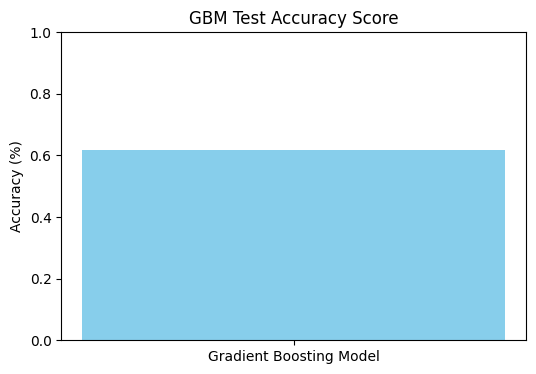

In [ ]:
# Plot the accuracy score
plt.figure(figsize=(6, 4))
plt.bar(['Gradient Boosting Model'], [accuracy_knn], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Score")
plt.show()

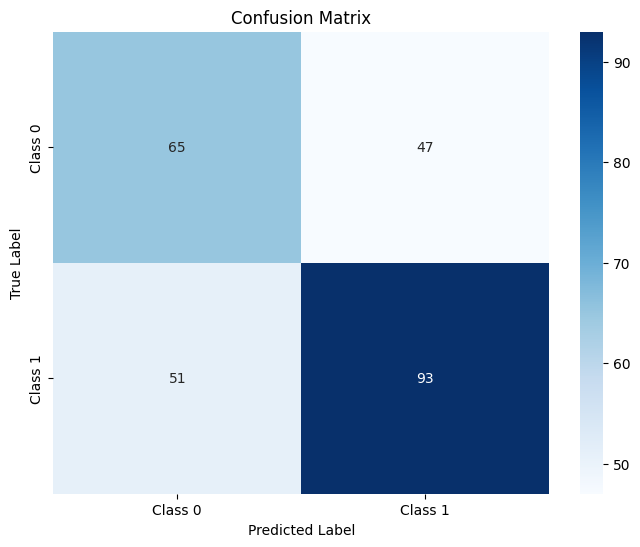

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Label: Dominance**

In [ ]:
mega_df['dominance']

,dominance
0,2.829352
1,2.829352
2,8.044368
3,8.044368
4,4.713312
...,...
1275,4.308472
1276,5.000000
1277,5.000000
1278,5.000000


In [ ]:
# set threshold to 4.5. If the value in arousal column is >= threshold set it to 1 else 0

threshold = 4.5
mega_df['dominance'] = mega_df['dominance'].apply(lambda x: '1' if float(x) >= threshold else '0')

In [ ]:
mega_df['dominance']

,dominance
0,0
1,0
2,1
3,1
4,1
...,...
1275,0
1276,1
1277,1
1278,1


In [ ]:
# DataFrame is named mega_df
# shuffled_df = mega_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Assuming your DataFrame is named 'mega_df'
features = mega_df.iloc[:, :6400].values  # Selecting the first 128 columns as features
label = mega_df['dominance'].values  # Selecting the 129th column as the label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=32)

In [ ]:
y_test = np.array([int(Y) for Y in y_test])
y_train = np.array([int(Y) for Y in y_train])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1024, 6400)
(1024,)
(256, 6400)
(256,)


In [ ]:
# Create an SVM classifier
svm_model = SVC(kernel='linear', C=1)  # You can also try 'rbf' or 'poly' kernels
# Train the model
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_SVC = svm_model.predict(X_test)
# Calculate the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracy_svc * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred_SVC))

Accuracy: 57.42%
              precision    recall  f1-score   support

           0       0.51      0.52      0.52       112
           1       0.62      0.62      0.62       144

    accuracy                           0.57       256
   macro avg       0.57      0.57      0.57       256
weighted avg       0.57      0.57      0.57       256



In [ ]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()
# Train the model on the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred_DT = clf.predict(X_test)
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_DT)
class_report = classification_report(y_test, y_pred_DT)
# Print the results
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("Classification Report:")
print(class_report)

Accuracy: 53.12%
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.58      0.52       112
           1       0.60      0.49      0.54       144

    accuracy                           0.53       256
   macro avg       0.54      0.54      0.53       256
weighted avg       0.54      0.53      0.53       256



In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to tune the model
# Train the KNN model on the training data
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
# Print the results
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print("KNN Classification Report:")
print(class_report_knn)

KNN Accuracy: 66.41%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       112
           1       0.69      0.72      0.71       144

    accuracy                           0.66       256
   macro avg       0.66      0.66      0.66       256
weighted avg       0.66      0.66      0.66       256



In [ ]:
# Initialize the Gradient Boosting classifier
gbm = GradientBoostingClassifier()
# Train the GBM model on the training data
gbm.fit(X_train, y_train)
# Make predictions on the test data
y_pred_gbm = gbm.predict(X_test)
# Evaluate the GBM model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
# Print the results
print(f"GBM Accuracy: {accuracy_gbm * 100:.2f}%")
print("GBM Classification Report:")
print(class_report_gbm)

GBM Accuracy: 63.28%
GBM Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       112
           1       0.67      0.69      0.68       144

    accuracy                           0.63       256
   macro avg       0.63      0.62      0.63       256
weighted avg       0.63      0.63      0.63       256



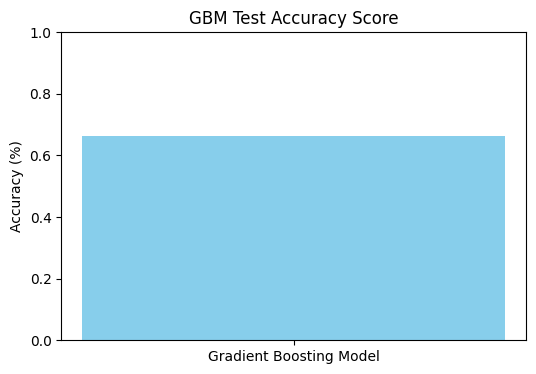

In [ ]:
# Plot the accuracy score
plt.figure(figsize=(6, 4))
plt.bar(['Gradient Boosting Model'], [accuracy_knn], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Score")
plt.show()

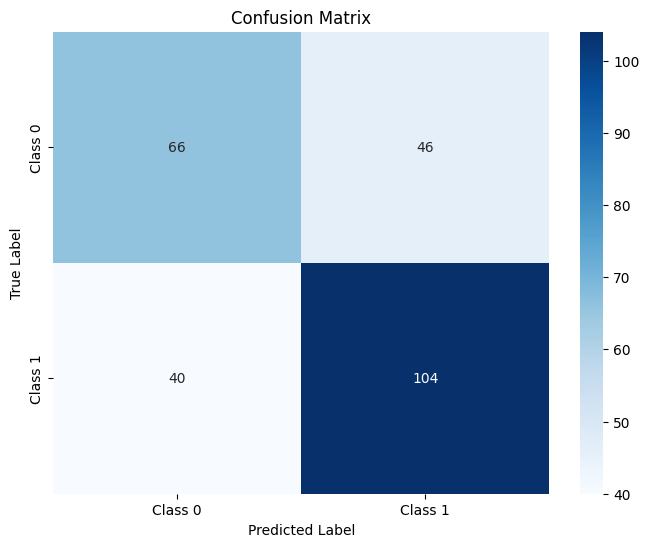

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Label: Liking**

In [ ]:
mega_df['liking']

,liking
0,9.000000
1,9.000000
2,8.972696
3,8.972696
4,9.000000
...,...
1275,7.264408
1276,6.586440
1277,6.586440
1278,3.494912


In [ ]:
# set threshold to 4.5. If the value in arousal column is >= threshold set it to 1 else 0

threshold = 4.5
mega_df['liking'] = mega_df['liking'].apply(lambda x: '1' if float(x) >= threshold else '0')

In [ ]:
mega_df['liking']

,liking
0,1
1,1
2,1
3,1
4,1
...,...
1275,1
1276,1
1277,1
1278,0


In [ ]:
# DataFrame is named mega_df
# shuffled_df = mega_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Assuming your DataFrame is named 'mega_df'
features = mega_df.iloc[:, :6400].values  # Selecting the first 128 columns as features
label = mega_df['liking'].values  # Selecting the 129th column as the label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=32)

In [ ]:
y_test = np.array([int(Y) for Y in y_test])
y_train = np.array([int(Y) for Y in y_train])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1024, 6400)
(1024,)
(256, 6400)
(256,)


In [ ]:
# Create an SVM classifier
svm_model = SVC(kernel='linear', C=1)  # You can also try 'rbf' or 'poly' kernels
# Train the model
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_SVC = svm_model.predict(X_test)
# Calculate the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracy_svc * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred_SVC))

Accuracy: 66.80%
              precision    recall  f1-score   support

           0       0.48      0.41      0.44        82
           1       0.74      0.79      0.76       174

    accuracy                           0.67       256
   macro avg       0.61      0.60      0.60       256
weighted avg       0.66      0.67      0.66       256



In [ ]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()
# Train the model on the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred_DT = clf.predict(X_test)
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_DT)
class_report = classification_report(y_test, y_pred_DT)
# Print the results
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("Classification Report:")
print(class_report)

Accuracy: 62.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43        82
           1       0.73      0.71      0.72       174

    accuracy                           0.62       256
   macro avg       0.57      0.58      0.57       256
weighted avg       0.63      0.62      0.63       256



In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to tune the model
# Train the KNN model on the training data
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
# Print the results
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print("KNN Classification Report:")
print(class_report_knn)

KNN Accuracy: 67.19%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.45      0.47        82
           1       0.75      0.78      0.76       174

    accuracy                           0.67       256
   macro avg       0.62      0.61      0.62       256
weighted avg       0.67      0.67      0.67       256



In [ ]:
# Create and train a Logistic Regression model
lrc_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lrc_model.fit(X_train, y_train)
# Make predictions
y_pred_LRC = lrc_model.predict(X_test)
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_LRC)
print(f"Accuracy: {accuracy_lr * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred_LRC))

Accuracy: 68.36%
              precision    recall  f1-score   support

           0       0.51      0.39      0.44        82
           1       0.74      0.82      0.78       174

    accuracy                           0.68       256
   macro avg       0.62      0.61      0.61       256
weighted avg       0.67      0.68      0.67       256



In [ ]:
# Initialize the Gradient Boosting classifier
gbm = GradientBoostingClassifier()
# Train the GBM model on the training data
gbm.fit(X_train, y_train)
# Make predictions on the test data
y_pred_gbm = gbm.predict(X_test)
# Evaluate the GBM model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
# Print the results
print(f"GBM Accuracy: {accuracy_gbm * 100:.2f}%")
print("GBM Classification Report:")
print(class_report_gbm)

GBM Accuracy: 68.75%
GBM Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.17      0.26        82
           1       0.70      0.93      0.80       174

    accuracy                           0.69       256
   macro avg       0.62      0.55      0.53       256
weighted avg       0.65      0.69      0.63       256



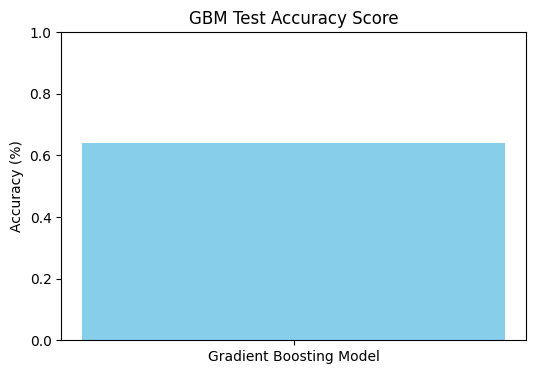

In [ ]:
# Plot the accuracy score
plt.figure(figsize=(6, 4))
plt.bar(['Gradient Boosting Model'], [accuracy_gbm], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Score")
plt.show()

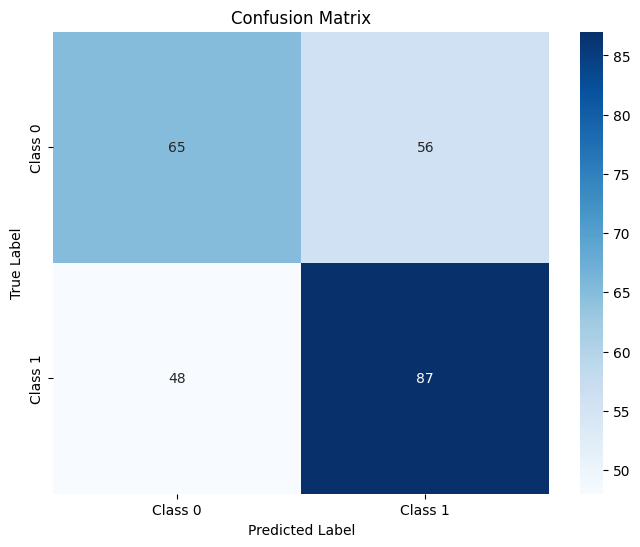

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_SVC)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()